<h1 style="font-family: Georgia, serif;font-size: 2.5em;margin-left: 3em;margin-right: 4em;"> 

---

Probabilités 2024/25 : Projet numérique

---

</h1> 

In [1]:
## Import des packages et des fonctions utiles pour le projet

#-----------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection

#-----------------------------------------------------

## Vecteur de couleurs
Cat=np.array(['#F8B005','#E35704','#A92A04'])

## Fonction pour représenter les simulations
def plotSim(S,figsize=(7,7),fromAbove=True,cropSim=True):

    ## Sort by increasing time
    Sim=S.copy()
    indSort=np.argsort(Sim[:,0])
    if fromAbove==False:
        indSort=np.flip(indSort)
    Sim=Sim[indSort,:]
    
    coordinates,sizes,colors = Sim[:,1:3], Sim[:,3], Cat[Sim[:,4].astype(int)]
    
    # Calculate bottom-left corner of each rectangle to center it
    bottom_left_coords = coordinates - np.stack([sizes, sizes], axis=1)*(2**0.5)/2

    # Create the rectangles
    rectangles = [patches.Rectangle((x, y), w, h,angle=45,rotation_point='center') for (x, y), w, h in zip(bottom_left_coords, sizes*(2**0.5), sizes*(2**0.5))]

    # Create a PatchCollection and apply the colors
    collection = PatchCollection(rectangles, facecolor=colors, edgecolor='black')
    
    ## Plot
    fig,ax = plt.subplots(figsize=figsize)
    ax.add_collection(collection)
    if cropSim:
        ax.set_xlim(D[0],D[1])
        ax.set_ylim(D[0],D[1])
    else:
        ax.set_xlim(Dext[0],Dext[1])
        ax.set_ylim(Dext[0],Dext[1])
    plt.show()

## Introduction

<h1 style="font-family: Georgia, serif;font-size: 1.1em;margin-left: 3em;margin-right: 4em;"> 

---

La géométrie stochastique est une branche des probabilités qui s'intéresse à la modélisation d'objets géométriques (e.g. points, lignes, polygones,...) dont les attributs et/ou la position dans l'espace sont aléatoires. Ces modèles sont utilisés pour modéliser un grand nombre de phénomènes, comme par exemple la position des épicentres  de séismes, la positions des arbres dans une forêt, ou la disposition de fibres ou de grains dans des matériaux composites.

L'objectif de ce projet est de construire et de simuler un modèle simple de géométrie stochastique, le modèle dit des *feuilles mortes*. Il tire son nom du fait qu'il peut être vu comme une façon de modéliser des tapis de feuilles mortes sur le sol. L'idée est la suivante: on assimile les feuilles à des carrés "apparaissant" à des temps aléatoires et à des positions aléatoires sur un domaine $\mathcal{D}\subseteq \mathbb{R}^2$ (le sol). On considère également que la taille et la couleur de ces carrés sont aléatoires. En supposant que les feuilles tombent depuis un temps $t=-\infty$ et on considère l'état du domaine $\mathcal{D}$ à l'instant $t=0$ (le tapis de feuilles).

---

</h1> 

## I - Temps d'arrivée des feuilles

<h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 

---

On suppose qu'on observe le tapis de feuille mortes au temps $T_0=0$ et que des feuilles sont tombées depuis un temps infini. On note ainsi $(T_{k})_{k\in\mathbb{Z}_-^*}$ la séquence des temps d'arrivée sur le sol des feuilles: $T_{-1}\le 0$ est le temps d'arrivée de la dernière feuille du tapis, $T_{-2}\le T_{-1}$ le temps d'arrivée de l'avant-dernière feuille, etc.

Afin de modéliser les temps aléatoires $(T_{-i})_{i\in\mathbb{N}^*}$ auxquels les feuilles mortes tombent sur le sol, nous recourrons à un modèle permettant de représenter des points aléatoires dans l'intervalle $I = ]-\infty, 0]$: le processus de Poisson (homogène). Ce modèle est défini de la manière suivante :

1. Pour tout $ A \in {\cal B} (]-\infty, 0])$ borné et fixé, le nombre de points $N (A)=\text{Card}\lbrace i\in\mathbb{N}^* : T_{-i} \in A\rbrace$ suit
      une loi de Poisson de paramètre $\theta \, | A |$, où $\theta \in \mathbb{R}^+$ et $|A|$ est la mesure de Lebesgue de $A$. On a donc
      $$ \mathbb{P} ( N (A) = n) = \exp \bigl( - \theta | A | \bigr) \frac{
        \bigl( \theta | A | \bigr)^n }{n!},~n \in \N $$

2. Pour tout $p\ge 2$, si $A_1,...,A_p \in {\cal B} (]-\infty, 0]) $ sont 
      disjoints deux à deux, alors $ N(A_1),...,N(A_p)$ sont 
      mutuellement indépendants.

Le paramètre $\theta$ est appelé l'intensité (ou densité) du processus de Poisson.

---

</h1> 


**Question 1.a.** Pour $i\in\mathbb{N}^*$ on pose $E_i = T_{-i +1} - T_{-i}$. Justifier que $\forall i\in\mathbb{N}^*, \tau >0,$  les événements $\lbrace E_i > \tau\rbrace$ et $\lbrace N([T_{-(i-1)}-\tau, T_{-(i-1)}[)=0\rbrace$ sont identiques, tout comme les évènements $\lbrace T_{-(i-1)}=t\rbrace$ et $ \lbrace  N([t,0[)=i-1\rbrace \cap\lbrace  N(]t,0[)=i-2 \rbrace$ pour $t<0$ et $i>1$.


SCAN

-> On utilise la définition des différents évènements introduits dans l'énoncé :

Soit $i\in\mathbb{N}^*, \tau >0, \omega_0 \in\Omega$, on a les équivalences : 

$ (\omega_0 \in\lbrace E_i > \tau\rbrace) \Leftrightarrow (\omega_0 \in\lbrace T_{-i+1}-\tau > T_{-i}\rbrace) \Leftrightarrow (\omega_0 \in\lbrace \omega |$ aucune feuille n'est tombée sur le sol durant l'intervalle de temps $[T_{-i+1}-\tau , T_{-i+1}[   \rbrace) \Leftrightarrow (\omega_0 \in\lbrace N([T_{-(i-1)}-\tau, T_{-(i-1)}[)=0\rbrace) $

Soit $i\in\mathbb{N}$ \ {0,1}, $t<0, \omega_0 \in\Omega$, on a les équivalences : 

$ (\omega_0 \in\lbrace T_{-(i-1)}=t\rbrace) \Leftrightarrow (\omega_0 \in\lbrace \omega |$ la feuille -(i-1) est tombée sur le sol à l'instant $t \rbrace) \Leftrightarrow (\omega_0 \in\lbrace \omega |$ (i-2) feuilles sont tombée sur le sol durant l'intervalle de temps $\in ]t,0[\rbrace \cap \lbrace \omega |$ (i-1) feuilles sont tombée sur le sol durant l'intervalle de temps $\in [t,0[ \rbrace) \Leftrightarrow (\omega_0 \in\lbrace  N([t,0[)=i-1\rbrace \cap\lbrace  N(]t,0[)=i-2 \rbrace) $


Ainsi, on en déduit que $\forall i\in\mathbb{N}^*, \tau >0,$  $\lbrace E_i > \tau\rbrace = \lbrace N([T_{-(i-1)}-\tau, T_{-(i-1)}[)=0\rbrace$, et que $\forall t<0, i>1,$  $ \lbrace T_{-(i-1)}=t\rbrace = \lbrace  N([t,0[)=i-1\rbrace \cap\lbrace  N(]t,0[)=i-2 \rbrace$.




**Question 1.b.** En déduire que $\forall i\in\mathbb{N}^*$, $E_i$ suit une loi exponentielle de paramètre $\theta$.

*Indication: Pour $i>1$, on pourra passer par le calcul de $\mathbb{P}(N([T_{-(i-1)}-\tau, T_{-(i-1)}[)=0)$ et utiliser le théorème de l'espérance totale pour calculer cette probabilité (la définition de la loi de $N(A)$ n'étant valable a priori que pour des boréliens $A$ déterministes/fixés).* 

SCAN

**Question 1.c.** Soit $n\in\mathbb{N}$ où $n\ge 2$, et soient $e_1, \dots, e_{n-1} \in \R_+$. Montrer que $\mathbb{P}(E_n>\tau\vert E_1=e_1, \dots, E_{n-1}=e_{n-1} ) = \mathbb{P}(E_n>\tau)$. 

*Indication: On pourra poser  $\mathcal{H}_{n-1} = \lbrace E_1=e_1, \dots, E_{n-1}=e_{n-1}\rbrace$ et exprimer $\mathcal{H}_{n-1}$ en fonction des variables $T_{-i}$.* 

SCAN

**Question 1.d.** En déduire que la suite $(E_i)_{i\in\mathbb{N}^*} $ est une suite de variables aléatoires indépendantes, toutes de loi exponentielle de paramètre $\theta$.

SCAN

**Question 1.dbis.(Bonus)** Montrer que inversement, si $(E_i)_{i\in\mathbb{N}^*} $ est une suite de variables aléatoires indépendantes, toutes de loi exponentielle de paramètre $\theta$, alors la suite $(T_{-i})_{i\in\mathbb{N}^*}$ telle que $E_i = T_{-i +1} - T_{-i}$ définit un processus de Poisson sur $]-\infty, 0[$.

J'ai fait des choses au brouillon, mais là je suis vraiment bloqué... !!!

**Question 1.e.**  Implémenter une fonction qui, étant données une valeur $t_{\min}<0$ et une valeur de $\theta$, permet de simuler les temps d'arrivée des feuilles tombant dans l'intervalle $[t_{\min},0[$, i.e. les variables $(T_{-i})_{i\in\mathbb{N}^*}$ telles que $T_{-i} \in [t_{\min},0[$. On veillera à ce que les temps d'arrivées soient retournés un vecteur trié dans l'ordre croissant.

In [2]:
def simTempsArrivee(t_min,theta):
    def simExpo(theta):
        u = np.random.rand()
        return(-np.log(u)/theta) # Méthode d'inversion

    T_liste = []
    t = 0
    while t >= t_min :
        E = simExpo(theta)
        t -= E
        T_liste.append(t)
    T = np.array(T_liste)
    T = np.flip(T) #trier par ordre croissant le tableau qui l'est actuellement par ordre décroissant
    return(T)



## II - Caractéristiques des feuilles

<h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 


---

Dans la suite du projet, on pose $\mathcal{D}=[-1,1]\times [-1,1]$ et $\mathcal{D}_{ext}=[-2,2]\times[-2,2]$.


On passe maintenant à la modélisation des caractéristiques des feuilles $F$, à savoir leur position, leur couleur et leur taille.

Comme indiqué en introduction, les feuilles sont assimilées à des carrés de $\mathbb{R}^2$. En particulier, on suppose que toutes les feuilles tombent avec la même orientation: on peut donc assimiler ces feuilles/carrés à des ''boules'' (fermées) pour la norme $\Vert\cdot\Vert_1$ définie par $\Vert x\Vert_1 = \vert x_1\vert + \vert x _2\vert$, $x=(x_1,x_2)\in\mathbb{R}^2$. Ainsi chaque feuille $F$ est en somme une boule de centre $\chi(F)\in\mathbb{R}^2$ et de rayon $\rho(F)>0$ aléatoires.

La position d'une feuille $F$ sur le sol est spécifiée par le centre $\chi(F)\in\mathbb{R}^2$ du carré/de la boule correspondant(e). On suppose que les feuilles tombent uniformément dans $\mathcal{D}_{ext}$, i.e. $\chi(F)\sim \mathcal{U}(\mathcal{D}_{ext})$.

La taille d'une feuille $F$ est spécifiée par le rayon $\rho(F)>0$ de la boule correspondante. Ce rayon suit une loi qui sera précisée plus tard, mais on suppose que la taille des feuilles est bornée par $1/2$, de sorte que seules les feuilles tombant dans $\mathcal{D}_{ext}$ intersectent la zone d'étude $\mathcal{D}$. 

On représente ci-dessous une feuille $F$ pour fixer les idées.

</h1> 

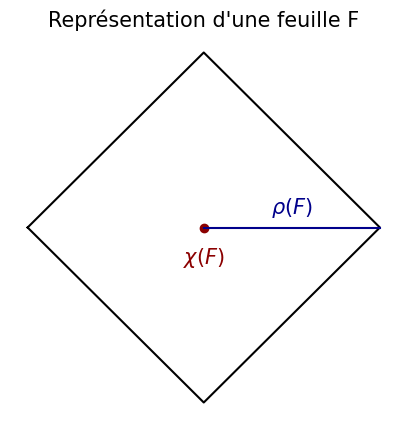

In [3]:
## Figure représentant une feuille F
fig,ax=plt.subplots(figsize=(5,5))
ax.plot([-1,0,1,0,-1],[0,1,0,-1,0],color="black")
ax.plot([0,1],[0,0],color="darkblue")
ax.scatter(0,0,color="darkred")
ax.text(-0.,-0.1,r"$\chi(F)$",fontsize=15,ha='center', va='top',color="darkred")
ax.text(0.5,0.05,r"$\rho(F)$",fontsize=15,ha='center', va='bottom',color="darkblue")
ax.set_title("Représentation d'une feuille F",fontsize=15)
ax.axis('off')
plt.show()


<h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 

La couleur d'une feuille $F$ est quant à elle modélisée par un entier $c(F)\in\lbrace 0,...,N_c-1\rbrace$ où $N_c$ désigne le nombre de couleurs possibles. La probabilité qu'une feuille soit de couleur $k$ est notée $\mathbb{P}(c(F)=k)=p_k\in[0,1]$ et on a $\sum_{k=0}^{N_c-1}p_k=1$.

Enfin, on considère que les caractéristiques (position, taille, couleur) d'une feuille sont indépendantes de son temps d'arrivée.
Ainsi, si on note $F$ une feuille arrivant à un des temps $T_{-i}$, $i\in\mathbb{N}^*$, alors $\chi(F)$,  $c(F)$ et $\rho(F)\in ]0,1/2[$  sont des variables aléatoires indépendantes de $T_{-i}$. 
On supposera également que  $\chi(F)$ est indépendante de $c(F)$ et $\rho(F)$, et que la loi de $\rho(F)$ dépend de la couleur $c(F)$ de la feuille.

---

</h1> 


**Question 2.a.** Soit $x_0 \in\mathcal{D}$ quelconque. Montrer que la probabilité qu'une feuille $F$ de couleur $c(F)=i\in\lbrace 0,\dots,N_c-1\rbrace$ et de taille $\rho(F)=r\in]0,1/2[$ recouvre le point $x_0$ est donnée par
$$
\begin{aligned}
P(x_0\in F \;\vert\; c(F)=i,\; \rho(F)=r)
%=\frac{\vert B_1(x_0, r)\vert }{\vert \mathcal{D}\vert}
=\frac{r^2 }{8}
\end{aligned}
$$


→ Pour toute la suite, on notera la norme 1 de sorte que : $\Vert x\Vert_1 = \Vert x\Vert$, pour tout vecteur $x$ de $\mathbb{R}^2$.
$$
\begin{aligned}
    P(x_0 \in F |  c(F) = i, \rho(F) = r)  \\
    &= P\left(\| x_0 - X(F) \| \leq r |  c(F) = i, \rho(F) = r\right) \\
    &= P\left(\| x_0 - X(F) \| \leq r\right) \quad \text{car } X(F) \perp\!\!\!\perp \rho(F) \text{ et } X(F) \perp\!\!\!\perp c(F), \\
    &= P\left(X(F) \in B(x_0, r)\right).
\end{aligned}
$$

Puisque $ X(F) \sim \mathcal{U}({D_{ext}}) $ et $ B(x_0, r) \subset {D_{ext}} $:
$$
P\left(X(F) \in B(x_0, r)\right) = \int_{B(x_0, r)} 
\frac{\mathbf{1}_{D_{ext}}(x)}{\lambda(D_{ext})} \, \text{d}x=\frac{\lambda(B(x_0, r))}{\lambda({D_{ext}})}.
$$

En utilisant la géométrie (aire d'un carré de diagonale 2r), on obtient $B(x_0, r) = (r/\sqrt{2})^2$, donc :
$$
P\left(X(F) \in B(x_0, r)\right) = \frac{(r \sqrt{2})^2}{4^2} = \frac{r^2}{8}.
$$


**Question 2.b.** Montrer que la probabilité qu'une feuille $F$ de couleur $i$  recouvre le point $x_0 \in\mathcal{D}$ est donnée par
$$
\begin{aligned}
\mathbb{P}(c(F)=i, x_0\in F)
&=\frac{p_ir_i^2}{8}
\end{aligned}
$$
où on note $p_i = \mathbb{P}(c(F)=i) $ et $r_i^2=\mathbb{E}\big[\rho(F)^2 \,\big\vert c(F)=i\big]$.


→ On commence par rappeler l'égalité suivante, où A, B et C sont des évènements de probabilité non nulle :
$$
P(A, B \mid C) = P(A \mid B, C) P(B \mid C)
$$
car en effet on a bien :
$$
\frac{P(A, B, C)}{P(C)} = \frac{P(A, B, C) }{P(B, C)}\frac{P(B, C)}{P(C)} 
$$

On calcule ensuite :
$$
\mathbb{P}(c(F)=i, x_0\in F) = \int_{\mathbb{R}} P(c(F)=i, x_0\in F \mid \rho(F) = r) dP_{\rho(F)}(r) 
$$
ce qui devient donc, avec l'égalité montré juste ci-dessus :
$$
\begin{aligned}
\mathbb{P}(c(F)=i, x_0\in F) &= \int_{\mathbb{R}} P( x_0\in F \mid c(F)=i,\rho(F) = r) P(c(F)=i\mid \rho(F) = r) dP_{\rho(F)}(r) \\
&=\int_{\mathbb{R}} \frac{r^2}{8} dP_{\rho(F),c(F)}(r,i) \\
&=\int_{\mathbb{R}} \frac{r^2}{8} dP_{\rho(F)\mid c(F)=i}(r) P(c(F)=i)\\
&= \frac{p_i}{8} \int_{\mathbb{R}} r^2dP_{\rho(F)\mid c(F)=i}(r)\\
&=\frac{p_ir_i^2}{8}
\end{aligned}
$$

Ainsi, on a montré que la probabilité qu'une feuille $F$ de couleur $i$  recouvre le point $x_0 \in\mathcal{D}$ est :
$$
\begin{aligned}
\mathbb{P}(c(F)=i, x_0\in F)
&=\frac{p_ir_i^2}{8}
\end{aligned}
$$

**Question 2.c.** En déduire que  la probabilité qu'une feuille $F$ recouvre le point $x_0 \in\mathcal{D}$ est donnée par
$$
\begin{aligned}
\mathbb{P}(x_0\in F)
&=\frac{1}{8}\sum_{j=0}^{N_c-1} p_jr_j^2
\end{aligned}
$$
et que la probabilité qu'une feuille $F$ soit de couleur $i$  sachant qu'elle recouvre le point $x_0 \in\mathcal{D}$ est donnée par
$$
\begin{aligned}
\mathbb{P}(c(F)=i \vert x_0\in F)
&=\frac{p_ir_i^2}{\sum_{j=0}^{N_c-1} p_jr_j^2}
\end{aligned}
$$

→ $\left( \{ c(F) = j \} \right)_{j \in \llbracket 0, N_c -1 \rrbracket}$ forme une partition de l'univers. D'après la formule des probabilités totales et en utilisant 2.a., on a donc :
$$
\begin{aligned}
\mathbb{P}(x_0\in F)
&=\sum_{j=0}^{N_c-1} \mathbb{P}(c(F)=j, x_0\in F)=\frac{1}{8}\sum_{j=0}^{N_c-1} p_jr_j^2
\end{aligned}
$$
et il vient ensuite, toujours en utilisant 2.b. :
$$
\begin{aligned}
\mathbb{P}(c(F)=i \vert x_0\in F)
&=\frac{\mathbb{P}(c(F)=j, x_0\in F)}{\mathbb{P}(x_0\in F)}=\frac{\frac{1}{8}\cdot p_ir_i^2}{\frac{1}{8}\cdot\sum_{j=0}^{N_c-1} p_jr_j^2}=\frac{p_ir_i^2}{\sum_{j=0}^{N_c-1} p_jr_j^2}
\end{aligned}
$$



<h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 

---

**Remarque:** Soit $C(x_0)\in\lbrace 0,\dots,N_c-1\rbrace$ la couleur de la feuille recouvrant le point $x_0\in\mathcal{D}$  au temps $T_0=0$. $C(x_0)$ correspond donc à la couleur de la dernière feuille recouvrant $x_0$.  On note que puisque les couleurs des feuilles sont tirées indépendamment de leurs temps d'arrivée, la distribution de la couleur de la dernière feuille recouvrant le point $x_0$ est la même que la distribution de la couleur de n'importe quelle autre feuille recouvrant $x_0$, à savoir $\mathbb{P}(c(F)= \cdot ~ \vert x_0\in F)$. On peut dès lors conclure que

$$
\begin{aligned}
\mathbb{P}(C(x_0)=i)=\mathbb{P}(c(F)=i \vert x_0\in F) = \frac{p_ir_i^2}{\sum_{j=0}^{N_c} p_jr_j^2}, \quad i\in \lbrace 0,\dots,N_c-1\rbrace.
\end{aligned}
$$

---

</h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 

**Question 2.cbis.(Bonus).**  Soit $\tilde N(x_0,\tau)$ le nombre de feuilles recouvrant le point $x_0$ et étant tombées dans l'intervalle de temps $[-\tau,0[$. Montrer que $ \tilde N(x_0,\tau)$ suit une loi de Poisson de paramètre $\tilde\theta\tau$ avec 

$$\tilde\theta=\frac{\theta}{8}\sum_{j=0}^{N_c-1} p_jr_j^2$$

*Indication: On pourra introduire la variable $\tilde N(\tau)$ donnant le nombre total de feuilles tombées  dans l'intervalle de temps $[-\tau,0[$ (quelle que soit leur couleur ou leur position).*

→ Soit $\tilde N(\tau)$ la variable aléatoire donnant le nombre total de feuilles tombées dans l'intervalle de temps $[-\tau,0[$, quelle que soit leur couleur ou leur position. Par définition du processus de poisson, et sachant $ |[-\tau,0[| = \tau$, on a :
$$ \mathbb{P} ( \tilde N(\tau) = n) = \exp \bigl( - \theta \tau \bigr) \frac{\bigl( \theta \tau \bigr)^n }{n!},~\forall  n \in \mathbb{N} $$
D'autre part, on sait que pour chaque feuille, la probabilité de recouvrir $x_0$ est identique et vaut : 
$\mathbb{P}(x_0\in F)
=\frac{1}{8}\sum_{j=0}^{N_c-1} p_jr_j^2 = p_0$. Donc pour tout $j \in \mathbb{N}$, la variable aléatoire $\mathbb{1}_{x_0 \in F_j}$ suit une loi de Bernoulli $\mathcal{B}(p_0)$.

Ainsi, la variable aléatoire $\sum_{j=0}^{n}\mathbb{1}_{x_0 \in F_j} = (\tilde N(x_0,\tau)|\tilde N(\tau) = n)$ suit une loi binomiale $\mathcal{B}(n,p_0)$.

D'après la formule des probabilité totale, sachant que $\left( \{ \tilde N(\tau) = n\} \right)_{n \in \mathbb{N}}$ forme une partition de l'univers, il vient pour tout $k \in \mathbb{N}$ :
$$
\begin{aligned}  
\mathbb{P}(\tilde N(x_0,\tau) =k) &= \sum_{n=0}^{+\infty}P(\tilde N(x_0,\tau)=k|\tilde N(\tau) = n)P(\tilde N(\tau) = n)\\
&=\sum_{n=k}^{+\infty}P(\tilde N(x_0,\tau)=k|\tilde N(\tau) = n)P(\tilde N(\tau) = n)\\
&=\sum_{n=k}^{+\infty}\binom{n}{k}p_0^k(1-p_0)^{n-k}\exp \bigl( - \theta \tau \bigr) \frac{\bigl( \theta \tau \bigr)^n }{n!} \\
&= \frac{p_0^k}{k!} \exp\bigl( - \theta \tau \bigr)\sum_{n=k}^{+\infty} \frac{(1-p_0)^{n-k}}{(n-k)!} \bigl( \theta \tau \bigr)^n          \\
&= \frac{\bigl( p_0 \theta \tau \bigr)^k}{k!} \exp\bigl( - \theta \tau \bigr)\sum_{n=0}^{+\infty} \frac{(1-p_0)^{n}}{(n)!} \bigl( \theta \tau \bigr)^{n}          \\
&=\frac{\bigl( p_0 \theta \tau \bigr)^k}{k!} \exp\bigl( - \theta \tau \bigr) \exp\bigl( (1-p_0) \theta \tau \bigr)\\
&=\frac{\bigl( p_0 \theta \tau \bigr)^k}{k!} \exp\bigl( -p_0 \theta \tau \bigr)\\
\end{aligned}
$$
On en déduit que
$ \tilde N(x_0,\tau)\sim \mathcal{P}( p_0 \theta \tau)$, ou encore $\tilde N(\tau)\sim \mathcal{P}( \tilde\theta\tau) $, avec :
$$\tilde\theta=p_0 \theta=\frac{\theta}{8}\sum_{j=0}^{N_c-1} p_jr_j^2$$

**Question 2.d.** En déduire que la probabilité qu'aucune feuille ne recouvre le point $x_0\in\mathcal{D}$ au temps $T_0=0$ est nulle (en pensant à bien justifier d'éventuels passages à la limite).


→ On a :
$\mathbb{P}(\tilde N(x_0,\tau) =0) = \exp\bigl( -\tilde \theta \tau \bigr)$.
Posons alors $a_n = (\tilde N(x_0,n) =0)$, tel que $\mathbb{P}(a_n) = \exp\bigl( -\tilde \theta n)$.

La probabilité de l'évènement {aucune feuille ne recouvre $x_0$ à $T_0$} s'écrit : 
$\mathbb{P}(\bigcap_{n \in \N} a_n)$

Or, remarquant que $a_{n+1}\subset a_n$, on a donc par continuité décroissante et sachant $\theta > 0$ :
$$\mathbb{P}(\bigcap_{n \in \N} a_n)  = \lim_{n\to\infty} P(a_n) = \lim_{n\to\infty} exp\bigl( -\tilde \theta n) = 0$$

Ceci signifie bien que la probabilité qu'aucune feuille ne recouvre le point $x_0\in\mathcal{D}$ au temps $T_0=0$ est nulle.

<h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 

---

On considère que la taille $\rho(F)$ d'une feuille dépend de la couleur $c(F)$ de la feuille comme suit: si la couleur de la feuille est $c(F)=i\in\lbrace 0,\dots, N_c-1\rbrace$, alors $\rho(F)$ suit une loi uniforme sur $[a_i,b_i]$ pour un certain $a_i\in[0,1/2[$ et un certain $b_i\in]a_i,1/2[$.

---

</h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 


**Question 3.a.** Montrer que l'expression de la fonction de répartition de $\rho(F)$ est donnée par:
$$
\mathcal{F_\rho}(r)
 = \sum_{i=0}^{N_c-1} p_i (\frac{r-a_i}{b_i-a_i}\mathbf{1}_{[a_i,b_i]}(r)+\mathbf{1}_{]b_i,\infty[}(r)), \quad r\ge 0.
$$

SCAN

**Question 3.b.** Implémenter une fonction permettant d'évaluer la fonction de répartition $\mathcal{F_\rho}$ et son inverse (généralisée) $\mathcal{F_\rho}^{-1}$. Ces fonctions prendront en entrée la valeur $r$ (resp. $p$) à laquelle on souhaite évaluer $\mathcal{F_\rho}$ (resp. $\mathcal{F_\rho}^{-1}$), ainsi qu'un vecteur $a\in [0,1/2]^{N_c}$ contenant les valeurs $a_i$ et un vecteur $b\in [0,1/2]^{N_c}$ contenant les valeurs $b_i$.

*Indication: On pourra utiliser la fonction "minimize_scalar" du package "scipy.optimize" afin de calculer les valeurs de $\mathcal{F_\rho}^{-1}$ à partir de celles de $\mathcal{F_\rho}$*

In [4]:
from scipy.optimize import minimize_scalar

def F_rho(r,a,b):
    somme = 0
    n = len(a)
    for i in range(n):
        if r >= a[i] and r <= b[i] :
            somme += p[i]*((r-a[i])/(b[i]-a[i]))
        if r> b[i] :
            somme += p[i]
    return(somme)

def invF_rho(p,a,b):
    if (p <= 0) or (p >= 1) :
        raise ValueError('invF_rho est définie sur ]0,1[')
    fonctionnelle = lambda x: x*(F_rho(x,a,b)-p >= 0) + 1e6*(1-(F_rho(x,a,b)-p >= 0))
    res = minimize_scalar(fonctionnelle)
    return(res.x)


<h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 

---

On considère dorénavant que $N_c=3$ et on pose les valeurs suivantes pour les vecteurs $a$ et $b$, et les probabilités $p_i$.

---

</h1> 

In [5]:
#Nombre de couleurs
Nc=3

## Probabilités p_i (stockées dans un vecteur)
p=np.array([0.5,0.4,0.1])

# Vecteur a
a=np.array([0.1,0.1,0.2])

# Vecteur b
b=np.array([0.25,0.25,0.5])

**Question 3.c.**  On appelle quantile d'ordre $\alpha\in [0,1]$ d'une variable aléatoire $X$ toute valeur $q_\alpha \in\mathbb{R}$ telle que $F_X(q_\alpha)=\alpha$. Calculer les quantiles de $\rho(F)$ pour $\alpha = k/50$ avec $k~\in~\lbrace 1,\dots,49\rbrace$.

In [6]:
# Vecteur contentant les quantiles
qth = [invF_rho(k/50,a,b) for k in range(1,50)]

<h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 

---

Un QQ-plot est une figure permettant de comparer visuellement deux distributions de probabilité au travers de leurs quantiles. Il s'agit d'un nuage de points où on représente en abscisse les quantiles de la première distribution et en ordonnée les quantiles de la deuxième. Si ce nuage de point est aligné avec la droite $y=x$, cela signifie que les deux distributions ont des quantiles (et donc des fonctions de répartition) similaires. 

---

</h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 


**Question 3.d.**  Simuler 10000 réalisations de la variable $\rho(F)$. Calculer les quantiles de la distribution empirique associée à ces échantillons (en utilisant la fonction *quantile* du package *numpy*) pour $\alpha = k/50$ avec $k~\in~\lbrace 1,\dots,49\rbrace$ et les comparer aux quantiles théoriques (calculés à la question précédente) avec un QQ-plot.

In [7]:
## Simulation de rho(F)
rho_sim= [invF_rho(np.random.rand(),a,b) for k in range(10000)]

# Calcul des quantiles des réalisations
qexp = np.quantile (rho_sim,[k/50 for k in range(1,50)])

C:\Users\marti\AppData\Local\Temp\ipykernel_17948\3430327231.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


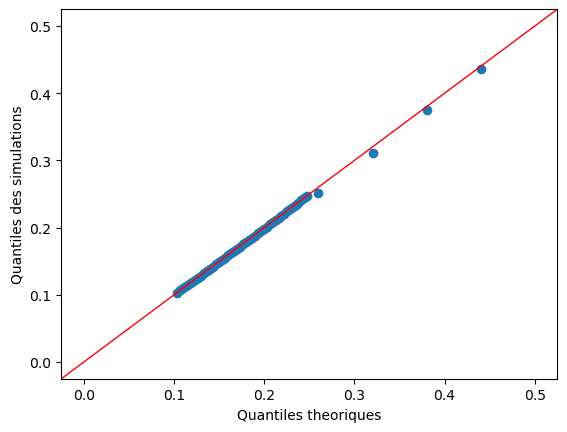

In [8]:
## QQ-plot
fig,ax=plt.subplots()
ax.axline((0, 0), (0.5, 0.5), linewidth=1, color='r')
ax.scatter(qth,qexp)
ax.set_xlabel("Quantiles theoriques")
ax.set_ylabel("Quantiles des simulations")
fig.show()

→ Le nuage de point semble parfaitement se placer le long la droite $y=x$. On en déduit que les deux distributions ont des quantiles très similaires, et donc des fonctions de répartition sont très proches.

## III - Simulation du tapis de feuilles mortes

<h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 

---

On s'intéresse dorénavant à la simulation de tapis de feuilles mortes. On prend en particulier les valeurs suivantes pour les variables $\mathcal{D}$,$\mathcal{D}_{ext}$ et $\theta$.

---

</h1> 

In [9]:
## Taille des fenêtres
D=[-1,1]
Dext=[-2,2]

## Paramètre du processus de Poisson
theta=1

**Question 4.a.** Implémenter une fonction permettant de simuler la taille d'une feuille étant donnée sa couleur $i$, et les vecteurs $a,b\in\R^3$ définis à Q.3.b.

In [10]:
def simTaille(i,a,b):
    taille = np.random.uniform(a[i], b[i])
    return(taille)

# Pour une feuille de couleur i, la taille suit une loi uniforme sur [a_i,b_i]

**Question 4.b.** Implémenter une fonction permettant de simuler la couleur d'une feuille étant donné le vecteur $p\in\R^3$ contenant les probabilités $p_i=\mathbb{P}(c(F)=i)$.

In [11]:
def simCouleur(p):
    couleurs_possibles = np.arange(len(p))
    couleur = np.random.choice(couleurs_possibles,p=p)
    return(couleur)

**Question 4.c.** Implémenter une fonction permettant de simuler la position d'une feuille étant donné le domaine $\mathcal{D}_{ext}$.

In [12]:

def simPosition(Dext):
    u = -2 + 4*np.random.rand(2)
    return(u)

# On suppose que les feuilles tombent uniformément dans Dext

**Question 4.d.** Implémenter une fonction permettant de simuler le temps d'arrivée et les caractéristiques des feuilles tombant dans l'intervalle $[t_{\min},0[$, étant donnée une valeur de $t_{\min}<0$. La fonction devra retourner un tableau dont les colonnes contiennent, dans l'ordre, le temps d'arrivée, la position,la taille et la couleur des feuilles. On veillera à ce que les temps d'arrivées soient ordonnés dans l'ordre croissant.

*Indication: On pourra repartir de l'implémentation de la fonction permettant de simuler les temps d'arrivées et utiliser les fonctions implémentées aux Q.4.a-c.*

In [13]:
def simFeuilles(t_min,theta,p,a,b,Dext):
    temps_arrivee = simTempsArrivee(t_min,theta) # Les temps d'arrivée sont ici ordonnés dans l'ordre croissant
    n = len(temps_arrivee)
    res = np.empty((n,5))
    for k in range(n):
        couleur_feuille = simCouleur(p)
        temps_arrivee_feuille = temps_arrivee[k]
        position_feuille_x, position_feuille_y = tuple(simPosition(Dext))
        taille_feuille = simTaille(couleur_feuille,a,b)
        feuille = [temps_arrivee_feuille, position_feuille_x, position_feuille_y, taille_feuille, couleur_feuille]
        res[k] = feuille
    return(res)


<h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 

---

D'après le modèle des feuilles mortes, des feuilles sont censées tomber depuis le temps $t=-\infty$, ce qui supposerait d'appeler la fonction définie à la question précédente avec $t_{\min}=-\infty$. Ceci est bien sûr impossible en pratique. 

On s'intéresse maintenant à comment obtenir une simulation du modèle en temps (de calcul) fini.

---

</h1> 

**Question 5.** Générer des simulations pour $t_{\min}=-100$ et $t_{\min}=-500$. Le domaine $\mathcal{D}$ est-il entièrement recouvert? Quelle contradiction obtenons-nous avec les résultats obtenus en Q.2? Existe-t-il une valeur finie de $t_{\min}$ qui permettrait, presque-sûrement, de lever cette contradiction?

[[-1.01094930e+02  7.32581213e-01  1.61796437e+00  1.43882731e-01
   1.00000000e+00]
 [-9.83572624e+01  1.19313348e+00  1.64295303e+00  1.75190009e-01
   0.00000000e+00]
 [-9.80104351e+01 -1.58935801e+00 -1.77438620e+00  1.67566178e-01
   0.00000000e+00]
 [-9.73494564e+01  1.68798770e+00 -8.83401347e-01  2.42259926e-01
   1.00000000e+00]
 [-9.61311180e+01  1.24737136e+00 -9.52701443e-01  1.34514299e-01
   1.00000000e+00]
 [-9.38185850e+01  1.72365993e+00  1.35579710e-01  2.50641884e-01
   2.00000000e+00]
 [-9.12668305e+01 -9.62652145e-01  9.61969418e-01  2.07760693e-01
   0.00000000e+00]
 [-9.10586215e+01  1.83175828e+00 -5.17827960e-01  1.34061775e-01
   1.00000000e+00]
 [-8.88175669e+01 -1.10933623e+00  1.76284070e+00  1.68342546e-01
   0.00000000e+00]
 [-8.78127433e+01  1.12099540e+00  6.21050898e-01  1.28295736e-01
   1.00000000e+00]
 [-8.76903293e+01  1.35681837e+00  1.83940473e+00  1.92467766e-01
   0.00000000e+00]
 [-8.75727395e+01 -1.40985506e+00 -1.76173410e+00  2.43442593e-01

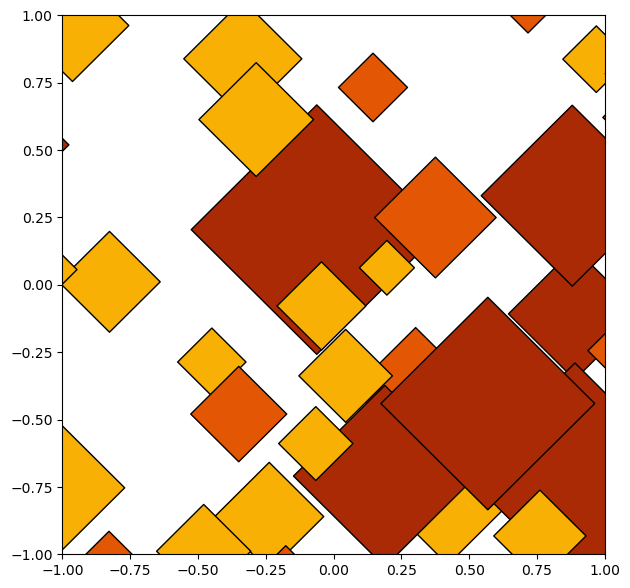

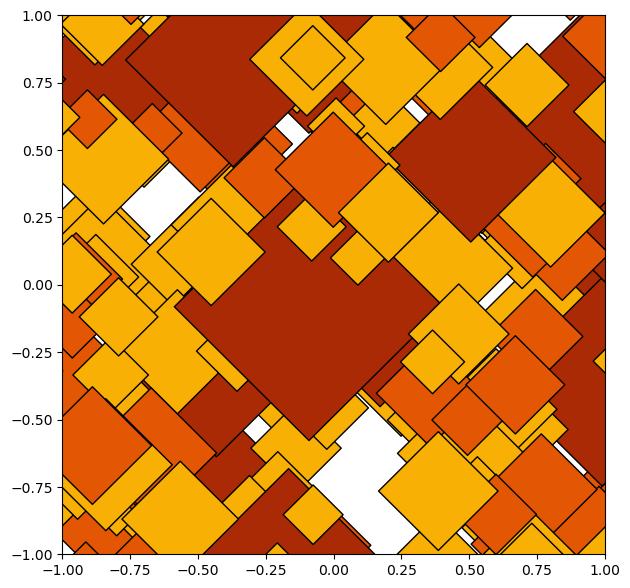

In [14]:
# Test: Simulation de tapis de feuilles

t_min_1 = -100
Sim_m100= simFeuilles(t_min_1,theta,p,a,b,Dext)
print(Sim_m100)
## Plot
plotSim(Sim_m100)

t_min_2 = -500
Sim_m500= simFeuilles(t_min_2,theta,p,a,b,Dext)
## Plot
plotSim(Sim_m500)

→ On observe que les simulations effectuées avec les valeurs de $t_{\min}$ suggérées ne permettent pas d'atteindre un état dans lequel le domaine $\mathcal{D}$ est entièrement couvert de feuille. Pourtant, d'après la question 2d, pour tout point $x_0\in\mathcal{D}$, la probabilité qu'aucune feuille ne recouvre le point $x_0$ au temps $T_0=0$ est nulle. 


Si ceci ne correspond pas aux observations précédente, ceci nous assure de l'existence d'une valeur finie de $t_{\min}$ qui permettrait, presque-sûrement, de lever cette contradiction, en obtennant un domaine $\mathcal{D}$ est entièrement couvert de feuille au temps $T_0=0$. En effet, si une telle valeure n'existait pas, il existerait $x_1\in\mathcal{D}$ tel que la probabilité qu'aucune feuille ne recouvre le point $x_1$ au temps $T_0=0$ soit non nulle, ce qui est impossible selon la question 2d.

<h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 

---

Pour lever la contradiction observée à la question précédente, on aurait besoin de déterminer a priori la valeur de $t_{\min}$ à partir de laquelle le sol est entièrement recouvert de feuilles. Cette valeur est aléatoire, car elle dépend des caractéristiques des feuilles qui tombent dans l'intervalle $[t_{\min},0[$. Afin de pouvoir tout de même accéder à une telle valeur, on se propose de considérer le modèle suivant.

Cette fois, on commence à $t=U_0=0$ avec un sol vide, et on fait tomber des feuilles selon un processus de Poisson $(U_i)_{i\in\mathbb{N}^*}$ sur $]0,\infty[$. Les caractéristiques des feuilles $F_i$ tombées à chaque instant $U_i$ sont déterminées de la même facon que pour le modèle des feuilles mortes. Soit $M = \inf\lbrace i \in\mathbb{N}^* : \mathcal{D}\subset\cup_{1\le k\le i} F_i  \rbrace$, c'est-à-dire l'indice (aléatoire) $M$ à partir duquel le sol est recouvert de feuilles.

---

</h1> 

**Question 6.a.** Soit $E \sim \mathcal{E}(\theta)$ indépendante des $U_i$. Pour $i\in\lbrace 1,...,M\rbrace$, on pose 
$$ T_{-i} = U_{M+1-i} - (U_M+E)$$
Montrer que les feuilles $(F_i)_{1\le i\le M}$ correspondent aux $M$ dernières feuilles d'un modèle des feuilles mortes ayant pour temps d'arrivée $(T_{-i})_{1\le i\le M}$ (i.e. $F_M$ arrive au temps $T_{-1}$, $F_{M-1}$ arrive au temps $T_{-2}$,...).

*Indication: On pourra utiliser la caractérisation des temps d'arrivée d'un modèles des feuilles mortes donnée en Q.1.dbis.*

il faut montrer que la suite $(T_{-i})_{i\in\mathbb{N}^*}$ définit un processus de Poisson sur $]-\infty, 0[$.
pour cela il suffit de montrer par la 1.dbis que la suite $(E_i)_{i\in\mathbb{N}^*} $ tel que $E_i = T_{-i +1} - T_{-i}$ est une suite de variables aléatoires indépendantes, toutes de loi exponentielle de paramètre $\theta$.

j'ai du mal a capter l'interet du + E dans la formule de $T_{-i}$

**Question 6.b.** En déduire une fonction permettant de simuler ces feuilles.

*Indication: Pour vérifier que les points du sol sont recouverts, on se contentera de vérifier que les points d'un maillage fin du sol, appelé Ddiscr dans le code ci-dessous, sont recouverts par une feuille*

In [15]:
## Maillage du sol
Ddiscr=np.stack(np.meshgrid(np.arange(D[0],D[1]+0.1,0.1),np.arange(D[0],D[1]+0.1,0.1)),axis=-1).reshape(-1,2)
Ddiscr[1:10,:]

array([[-0.9, -1. ],
       [-0.8, -1. ],
       [-0.7, -1. ],
       [-0.6, -1. ],
       [-0.5, -1. ],
       [-0.4, -1. ],
       [-0.3, -1. ],
       [-0.2, -1. ],
       [-0.1, -1. ]])

In [16]:
## PROPOSITION DE BASTIEN : ##
## QU'EN PENSES-TU LAURENTIN ?? ##
        ##ça m'a l'air solide##

def verification_couverture_totale_sol(simulation, maillage): 
    
    """Prend en argument un maillage du même type que celui Ddiscr proposé, 
    ainsi qu'une simulation du tapis de feuille, ie un array numpy dont les lignes sont les feuilles tombées,
    et dont les colonnes sont [temps_arrivee_feuille, position_feuille_x, position_feuille_y, taille_feuille, couleur_feuille]"""

    couverture_totale = True
    for point in maillage :
        x, y = tuple(point)
        if not verification_couverture_pt(simulation, x, y) :
            couverture_totale = False
            break          
    return(couverture_totale)


def verification_couverture_pt(simulation, pt_x, pt_y): 

    """Test de la couverture (ou non) du point de coordonnées (pt_x,pt_y) dans la simulation"""

    couverture_point = False
    for feuille in simulation:
        temps_arrivee_feuille, position_feuille_x, position_feuille_y, taille_feuille, couleur_feuille = tuple(feuille)
        if (abs(position_feuille_x-pt_x)+abs(position_feuille_y-pt_y) <= taille_feuille) :
            couverture_point = True
            break
    return(couverture_point)

In [17]:
def simFeuillesStop(theta,p,a,b,Dext):
    
    ## COMPLETER ##
    return None

In [18]:
## Simulation du tapis de feuilles
#Sim=simFeuillesStop(theta,p,a,b,Dext)
## Plot
#plotSim(Sim)

**Question 6.c.**  Quelle est la distribution de la taille de la dernière feuille tombée sur le sol? La comparer, avec un QQ-plot, à la taille de la dernière feuille sur un échantillon de 1000 tapis de feuilles simulés avec la fonction créée à la question précédente. Que peut-on en conclure sur la méthode de simulation proposée?

In [19]:
## Simulation des tapis et extraction de la taille de la dernière feuille

## COMPLETER ###

In [20]:
## Quantiles théoriques 
# qth=## COMPLETER ###

# ## Quantiles des simulations
# qexp=## COMPLETER ###

In [21]:
## QQ-Plot
# fig,ax=plt.subplots()
# ax.axline((0, 0), slope=1, linewidth=1, color='r')
# ax.scatter(qth,qexp)
# ax.set_xlabel("Quantiles theoriques")
# ax.set_ylabel("Quantiles des simulations")
# plt.show()

<h1 style="font-family: Georgia, serif;font-size: 1em;margin-left: 3em;margin-right: 4em;"> 

---

Face à cette nouvelle déconvenue, on adopte un point de vue différent sur le tapis de feuilles mortes. Jusqu'à maintenant, on observait les feuilles tomber et s'empiler (pendant un temps infini), sur le sol. Ainsi, à $t=T_0=0$, on observe, en vue de dessus notre tapis de feuilles mortes. 

Supposons désormais qu'il nous est possible d'observer le sol par en-dessous (par exemple, parce que le sol est en fait une verrière plane en dessous de laquelle on se trouve). Comme pour la question précédente,  on commence à $t=U_0=0$ avec un sol vide, et on fait tomber des feuilles selon un processus de Poisson $(U_i)_{i\in\mathbb{N}^*}$ sur $]0,\infty[$. Les caractéristiques des feuilles $F_i$ tombées à chaque instant $U_i$ sont déterminées de la même façon que pour le modèle des feuilles mortes et $M$ désigne une nouvelle fois l'indice (aléatoire) $M$ à partir duquel le sol est recouvert de feuilles.

Puisqu'on observe maintenant le sol par en-dessous, après l'instant $U_{M}$, le tapis ne change plus car le sol est recouvert de feuilles et donc les nouvelles feuilles qui tombent sont cachées par celle qui sont déjà présentes. Ainsi, contrairement à la construction précédente, le tapis est fixé à partir d'un certain temps. 

---

</h1> 


**Question 7.a.**  Pour $i\in\lbrace 1,...,M\rbrace$, on pose 
$$ T_{-i} = -U_{i}$$
Montrer qu'en associant la feuille $F_i$ au temps $T_{-i}$, les feuilles $(F_i)_{1\le i\le M}$ correspondent aux $M$ dernières feuilles d'un modèle des feuilles mortes.

**Question 7.b.** En déduire une fonction permettant de simuler ces feuilles. 

In [22]:
## QU'EN PENSES-TU LAURENTIN ?? PK est-ce que la durée de chargement est infinie ???

def simFeuillesDessous(theta,p,a,b,Dext):
    simulation_M_liste = []

    couleur_feuille_1 = simCouleur(p)
    temps_arrivee_feuille_1 = prochain_temps_arrivee(0)
    position_feuille_1_x, position_feuille_1_y = tuple(simPosition(Dext))
    taille_feuille_1 = simTaille(couleur_feuille_1,a,b)
    feuille_1 = [temps_arrivee_feuille_1, position_feuille_1_x, position_feuille_1_y, taille_feuille_1, couleur_feuille_1]
    simulation_M_liste.append(feuille_1)

    while  not verification_couverture_totale_sol(np.array(simulation_M_liste), Ddiscr) :
        couleur_feuille = simCouleur(p)
        temps_arrivee_feuille = prochain_temps_arrivee(simulation_M_liste[-1][0])
        position_feuille_x, position_feuille_y = tuple(simPosition(Dext))
        taille_feuille = simTaille(couleur_feuille,a,b)
        feuille = [temps_arrivee_feuille, position_feuille_x, position_feuille_y, taille_feuille, couleur_feuille]
        simulation_M_liste.append(feuille)
        
        

    simulation_T = np.array(simulation_M_liste)
    simulation_T[0] = -simulation_T[0]
    # simulation_T = np.sort(simulation_T, axis=0) ?? il sont déja ordonée en t décroissant non?
    simulation_T = simulation_T[::-1]#t'es d'accord avec ça?
    return(simulation_T)


def prochain_temps_arrivee(t_précédent):
    def simExpo(theta):
        u = np.random.rand()
        return(-np.log(u)/theta) # Méthode d'inversion
    E = simExpo(theta)
    t = t_précédent + E
    return(t)

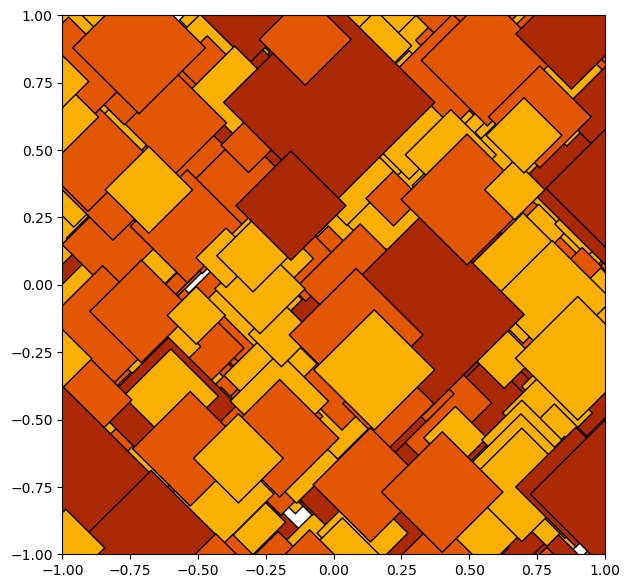

In [23]:
## Simulation du tapis de feuilles
Sim=simFeuillesDessous(theta,p,a,b,Dext)
## Plot
plotSim(Sim,fromAbove=False)

**Question 7.c.**  Comparer la distribution, avec un QQ-plot, de la taille de la dernière feuille tombée sur le sol à la taille de la dernière feuille sur un échantillon de 1000 tapis de feuilles simulés avec la fonction créée à la question précédente. Que peut-on en conclure sur la méthode de simulation proposée?

In [24]:
## Simulation des tapis et extraction de la taille de la dernière feuille

## COMPLETER ###

In [25]:
## Quantiles théoriques 
#qth=## COMPLETER ###

## Quantiles des simulations
#qexp=## COMPLETER ###



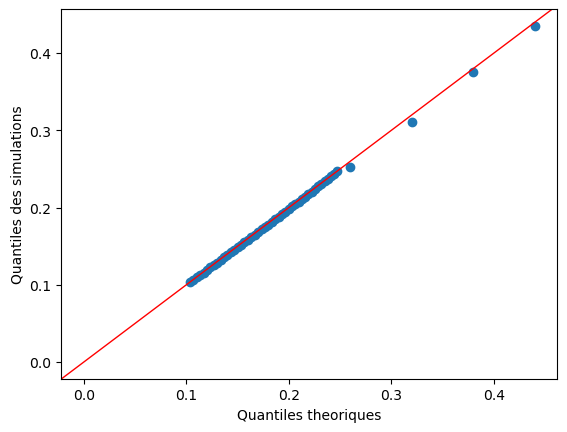

In [26]:
## QQ-Plot
fig,ax=plt.subplots()
ax.axline((0, 0), slope=1, linewidth=1, color='r')
ax.scatter(qth,qexp)
ax.set_xlabel("Quantiles theoriques")
ax.set_ylabel("Quantiles des simulations")
plt.show()

**Question 7.cbis.(Bonus)** Montrer qu'avec ce modèle, on retrouve que la probabilité que la couleur du tapis au point $x_0\in\mathcal{D}$  soit $i$ est également donnée par
$$P(C(x_0)=i)=\frac{p_i r_i^2}{\sum_{j=1}^{N_c} p_jr_j^2}$$

**Question 7.d.** Implémenter une fonction permettant, étant donné un ensemble de points $x_0\in\mathcal{D}$, de recalculer numériquement les probabilités $\mathbb{P}(C(x_0)=i)$ pour $i\in\lbrace 1, \dots, N_c\rbrace$ à partir de simulations de tapis (réalisées avec la fonction simFeuillesDessous). Appliquer cette fonction à l'ensemble de points $X_0$ défini dans le code et interpréter les résultats.

In [27]:
Sim_envers = simFeuillesDessous(theta,p,a,b,Dext)      #La dernière feuille tombée sur le pt détermine sa couleur, donc on parcourt la simulation par temps décroissant        
feuille = Sim_envers[2]
temps_arrivee_feuille, position_feuille_x, position_feuille_y, taille_feuille, couleur_feuille = tuple(feuille)
couleur_point = couleur_feuille
print(couleur_point)


1.0


In [28]:
##  Fonction de calcul des probabilités 
### X0 : Tableau contenant les coordonnées (sur chaque ligne) des points sur lequels on souhaite calculer les probabilités
### nsim : Nombre de simulations
def calcProb(X0,nsim):

    """Retourne un tableau numpy, ayant Nc colonnes le même nombre de lignes qu'il y a de points dans X0.
    En position (i,j) se trouve la probabilité P(C(X0[i]) = j)"""

    nb_pts = X0.shape[0]
    nc = len(p)     #Nombre de couleurs distinctes
    Prob = np.zeros((nb_pts,nc))
    for k in range(nsim):
        Sim = simFeuillesDessous(theta,p,a,b,Dext)
        Sim_envers = np.flip(Sim,axis=0)        #La dernière feuille tombée sur le pt détermine sa couleur, donc on parcourt la simulation par temps décroissants 
        for i in range(nb_pts) :
            point = X0[i]           
            for feuille in Sim_envers :
                temps_arrivee_feuille, position_feuille_x, position_feuille_y, taille_feuille, couleur_feuille = tuple(feuille)
                if (abs(position_feuille_x-point[0])+abs(position_feuille_y-point[1]) <= taille_feuille) :      #Si la feuille couvre le point
                    couleur_point = couleur_feuille
                    Prob[i,int(couleur_point)] += 1
                    break                               #Le point est nécessairement couvert dans cette simulation, donc on trouvera nécessairement une feuille le couvrant
    Prob = Prob/nsim
    return(Prob)

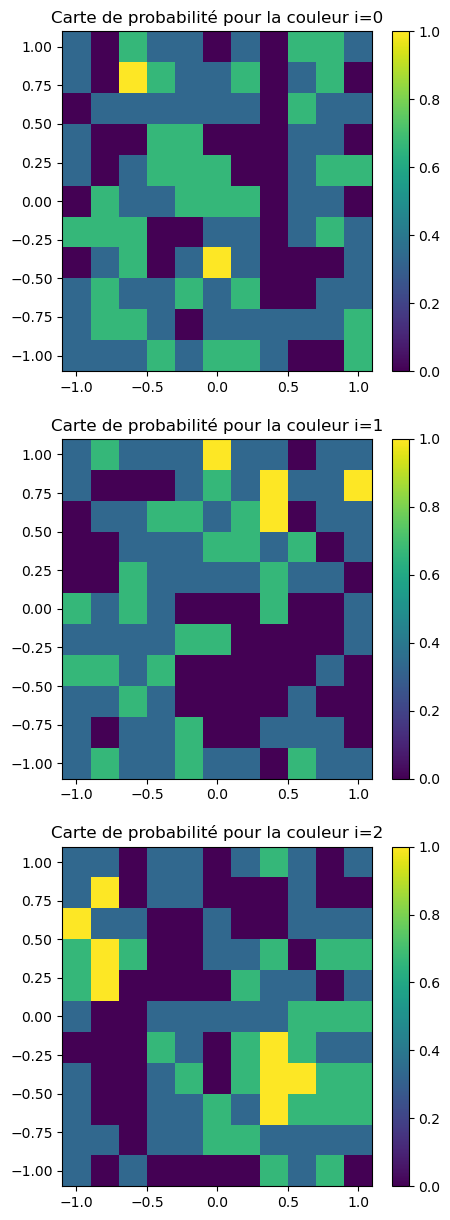

In [29]:
## Points sur lesquels évaluer les probabilités
X0=np.stack(np.meshgrid(np.arange(D[0],D[1]+0.2,0.2),np.arange(D[0],D[1]+0.2,0.2)),axis=-1).reshape(-1,2)

## Calcul et représentation
pvec=calcProb(X0,3)
fig, ax = plt.subplots(3,1,figsize=(5,15))
Ngd=int(X0.shape[0]**0.5)
for i in range(Nc):
    im=ax[i].pcolormesh(X0[:,0].reshape((Ngd,Ngd)),X0[:,1].reshape((Ngd,Ngd)),pvec[:,i].reshape((Ngd,Ngd)))
    ax[i].set_title("Carte de probabilité pour la couleur i="+str(i))
    fig.colorbar(im)
plt.show()     

**Question 7.dbis.(Bonus)** Proposer un code permettant de simuler un tapis de feuille étant donnée qu'on fixe la couleur $i_0$ de la feuille au point $(0,0)$. Calculer numériquement les probabilités afin de valider les résultats de simulation.

In [30]:
## Simulation conditionnelle
def simFeuillesDessousCond(i0,theta,p,a,b,Dext):   
    ## COMPLETER ###    


SyntaxError: incomplete input (2310758055.py, line 3)